In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skgstat import Variogram
%matplotlib inline

In [2]:

df = pd.read_csv('../../data/processed/WaterUpdated.csv')
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,Mundindi,...,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,Natta,...,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,Ngorika,...,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,11


In [3]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,time_passed
count,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000,57247.000000
mean,37111.315073,326.367720,667.788775,35.099731,-5.813696,266.639247,0.863399,0.662131,13.871469
std,21451.932483,3051.082266,692.906254,2.590760,2.812235,459.534102,0.343429,0.472988,10.136067
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,0.000000
25%,18516.500000,0.000000,0.000000,33.249951,-8.569270,65.000000,1.000000,0.000000,8.000000
50%,37069.000000,0.000000,370.000000,34.929707,-5.043410,212.000000,1.000000,1.000000,11.000000
75%,55651.500000,25.000000,1316.000000,37.177828,-3.357168,320.000000,1.000000,1.000000,16.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998916,30500.000000,1.000000,1.000000,53.000000


In [4]:
df.loc[df.time_passed < 0]

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57247 entries, 0 to 57246
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               57247 non-null  int64  
 1   amount_tsh       57247 non-null  float64
 2   gps_height       57247 non-null  int64  
 3   installer        54186 non-null  object 
 4   longitude        57247 non-null  float64
 5   latitude         57247 non-null  float64
 6   basin            57247 non-null  object 
 7   region           57247 non-null  object 
 8   lga              57247 non-null  object 
 9   ward             57247 non-null  object 
 10  population       57247 non-null  float64
 11  public_meeting   57247 non-null  int64  
 12  permit           57247 non-null  int64  
 13  extraction_type  57247 non-null  object 
 14  management       57247 non-null  object 
 15  payment          57247 non-null  object 
 16  water_quality    57247 non-null  object 
 17  quantity    

In [6]:
df.region.value_counts()

Iringa           5250
Shinyanga        4764
Mbeya            4559
Kilimanjaro      4322
Morogoro         3813
Arusha           3305
Kagera           3211
Mwanza           2863
Kigoma           2768
Ruvuma           2609
Pwani            2596
Tanga            2482
Dodoma           2189
Tabora           1928
Mara             1881
Rukwa            1700
Mtwara           1680
Singida          1623
Manyara          1557
Lindi            1367
Dar es Salaam     780
Name: region, dtype: int64

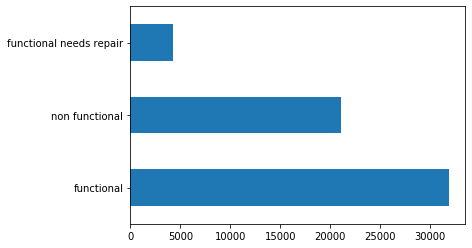

In [7]:
# visualizing the target variable
# some class imbalance, especially the functional needs repair category is under-represented
df.target.value_counts().plot.barh();

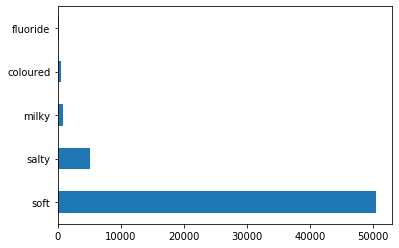

In [8]:
# Most water quality is 'soft'
df.water_quality.value_counts().plot.barh();

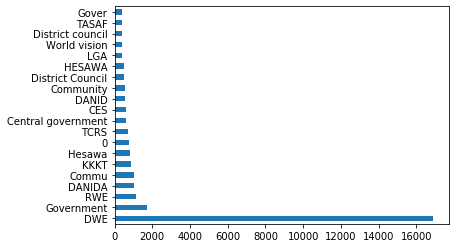

In [9]:
# One installer DWE accounts for about a third of observations
df.installer.value_counts().head(20).plot.barh();

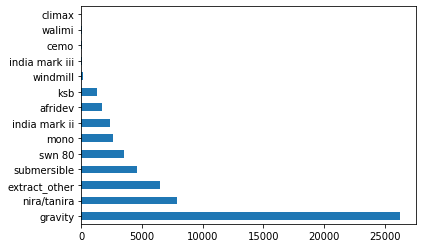

In [10]:
# most extraction type(around half) are of type 'gravity', 'other' is a substantial column here
df.extraction_type.value_counts().plot.barh();

In [11]:
#closer look at extraction_type
df.extraction_type.value_counts().cumsum()

gravity           26277
nira/tanira       34191
extract_other     40710
submersible       45284
swn 80            48839
mono              51471
india mark ii     53809
afridev           55550
ksb               56884
windmill          56994
india mark iii    57086
cemo              57176
walimi            57223
climax            57247
Name: extraction_type, dtype: int64

In [12]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed'],
      dtype='object')

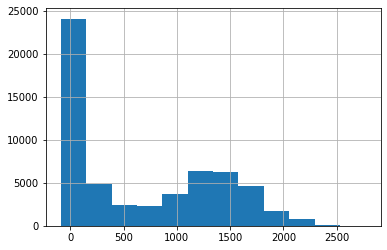

In [13]:
# altitude distributions -- many are around zero
df.gps_height.hist(bins=12);

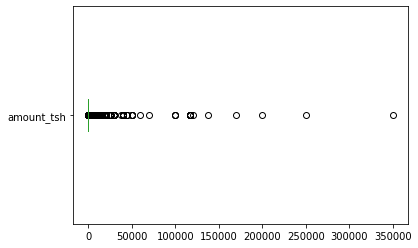

In [14]:
# amount tsh (total static head -- amount water available to waterpoint)
# couple huge outliers here
df.amount_tsh.plot.box(vert=False)

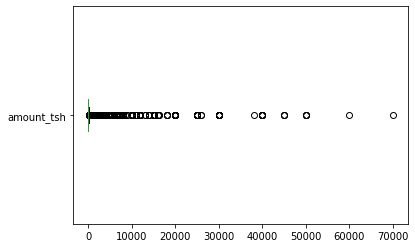

In [15]:
# Still big outliers, looks like most points are below 10k
df.loc[df.amount_tsh < 100000, 'amount_tsh'].plot.box(vert=False)

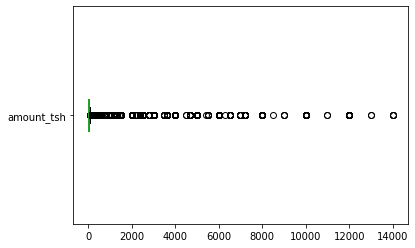

In [16]:
df.loc[df.amount_tsh < 15000, 'amount_tsh'].plot.box(vert=False)

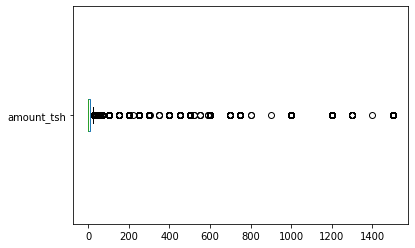

In [17]:
df.loc[df.amount_tsh < 2000, 'amount_tsh'].plot.box(vert=False)

In [18]:
# Almost all entries are less than 15k
len(df.loc[df.amount_tsh < 15000, 'amount_tsh'])/len(df)

0.9978863521232554

In [19]:
# ditto 5k
len(df.loc[df.amount_tsh < 5000, 'amount_tsh'])/len(df)

0.9841214386780093

In [20]:
# ...and 2k
len(df.loc[df.amount_tsh < 2000, 'amount_tsh'])/len(df)

0.9567313571016822

In [21]:
# 70 percent of values are zero. Max value is ~350000.. what's up with that? data issue or just 
# really small water values?
len(df.loc[df.amount_tsh == 0, 'amount_tsh'])/len(df)

0.69385295299317

In [22]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed'],
      dtype='object')

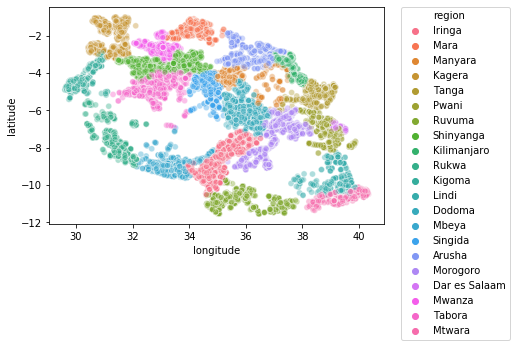

In [23]:
functional = df.loc[df.target=='functional']
sns.scatterplot('longitude', 'latitude', data=functional, alpha=0.4, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


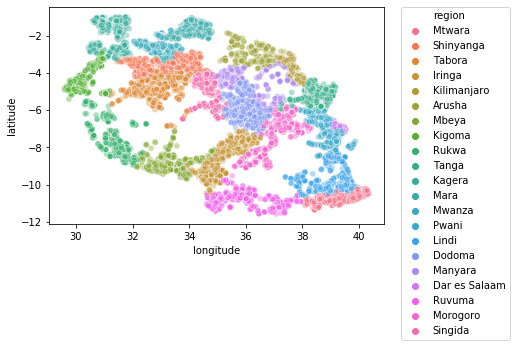

In [24]:
non_functional = df.loc[df.target=='non functional']
sns.scatterplot('longitude', 'latitude', data=non_functional, alpha=0.4, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


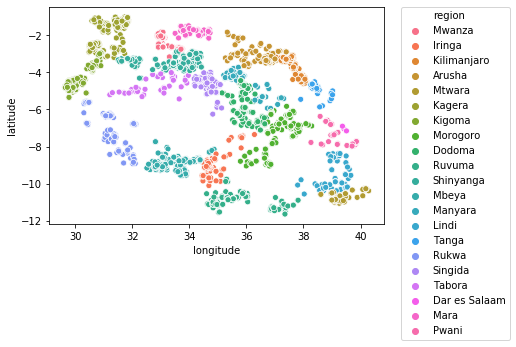

In [25]:
functional_needs_repair = df.loc[df.target=='functional needs repair']
sns.scatterplot('longitude', 'latitude', data=functional_needs_repair, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


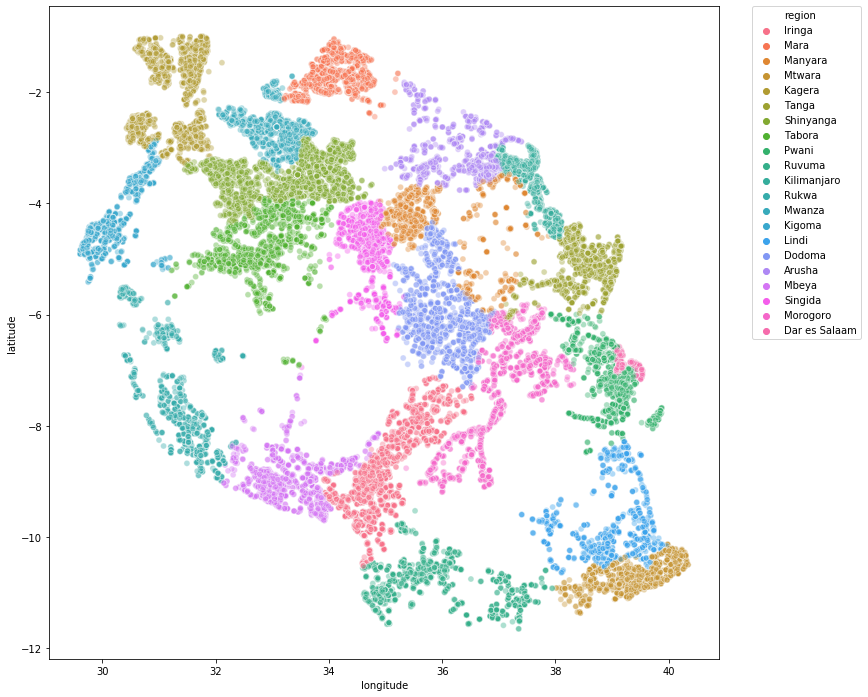

In [26]:
fig, ax= plt.subplots(figsize=(12,12))
sns.scatterplot('longitude', 'latitude', data=df, alpha=0.4, ax=ax, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [27]:
# about 1600 entries have longitude of zero
df.loc[df.longitude == df.longitude.min()]

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed
34095,27121,10.0,805,KUWASA,29.607122,-4.906265,Lake Tanganyika,Kigoma,Kigoma Urban,Bangwe,...,1,extract_other,other,pay per bucket,soft,dry,lake,communal standpipe multiple,non functional,42


In [28]:
len(df.region.value_counts())

21

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_latlong = df[['latitude', 'longitude']]
latlong_scaled = scaler.fit_transform(df_latlong)
pd.DataFrame(latlong_scaled).describe()

,0,1
count,5.724700e+04,5.724700e+04
mean,1.986463e-16,1.460191e-15
std,1.000009e+00,1.000009e+00
min,-2.075145e+00,-2.120095e+00
25%,-9.798606e-01,-7.139975e-01
50%,2.739077e-01,-6.562783e-02
75%,8.735222e-01,8.021256e-01
max,1.712098e+00,2.024698e+00


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/opt/anaconda3/

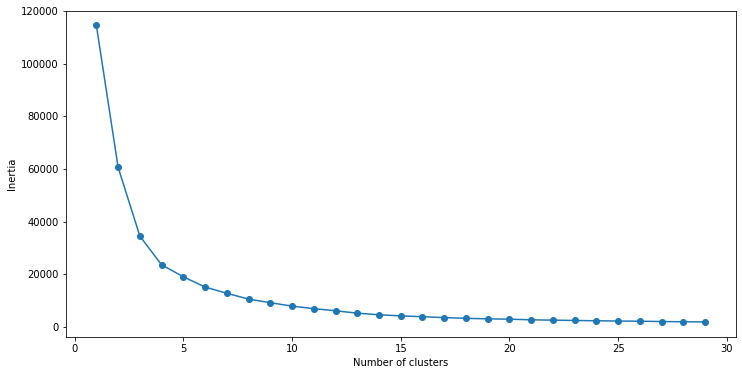

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_latlong = df[['latitude', 'longitude']]
latlong_scaled = scaler.fit_transform(df_latlong)
pd.DataFrame(latlong_scaled).describe()

SSE = []
for cluster in range(1,30):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(latlong_scaled)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++', random_state=16)
kmeans.fit(latlong_scaled)
train_pred = kmeans.predict(latlong_scaled)

In [31]:
df.gps_height.value_counts()

 0       19716
-15         59
-16         55
-13         54
 1290       51
         ...  
 2216        1
 2120        1
-55          1
 2306        1
 2128        1
Name: gps_height, Length: 2427, dtype: int64

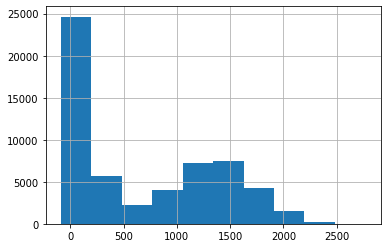

In [32]:
df.gps_height.hist()

ValueError: Invalid RGBA argument: 0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
57242        functional
57243        functional
57244        functional
57245        functional
57246        functional
Name: target, Length: 57247, dtype: object

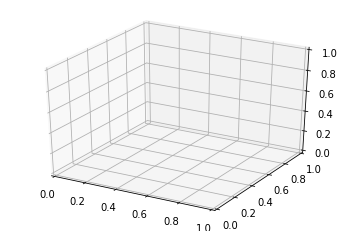

In [33]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 


#             c=iris.target, cmap=plt.cm.get_cmap('Greens', 3))

# # This function formatter will replace integers with target names
# formatter = plt.FuncFormatter(lambda val, loc: iris.target_names[val])

# # We must be sure to specify the ticks matching our target names
# plt.colorbar(ticks=[0, 1, 2], format=formatter);

# # Set the clim so that labels are centered on each block
# plt.clim(-0.5, 2.5)

# # Finally use the mapped values
# plt.scatter(df['carat'], df['price'], c=df['color'].map(color_map))
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['latitude'], df['longitude'], df['gps_height'], color=df.target, cmap=plt.cm.get_cmap('Greens', 3), linewidth=0.2)
plt.show()
 
# # to Add a color bar which maps values to colors.
# surf=ax.plot_trisurf(df['latitude'], df['longitude'], df['gps_height'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()
 
# # Rotate it
# ax.view_init(30, 45)
# plt.show()
 
# # Other palette
# ax.plot_trisurf(df['latiude'], df['longitude'], df['gps_height'], cmap=plt.cm.jet, linewidth=0.01)
# plt.show()


In [34]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed'],
      dtype='object')

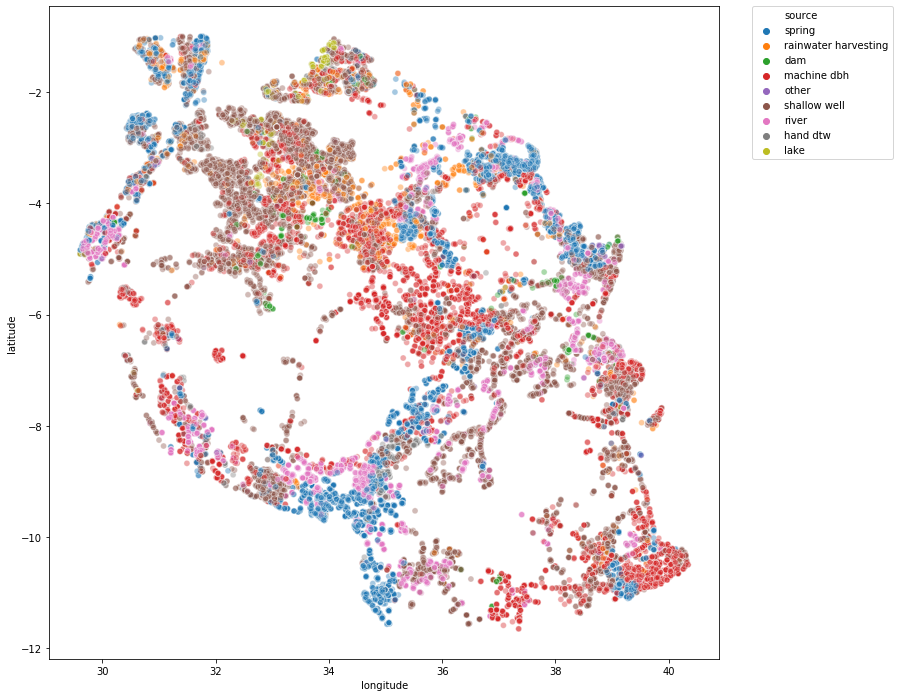

In [38]:
fig, ax= plt.subplots(figsize=(12,12))
sns.scatterplot('longitude', 'latitude', data=df, alpha=0.4, ax=ax, hue='source')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    

In [41]:
df.target.value_counts()

functional                 31899
non functional             21076
functional needs repair     4272
Name: target, dtype: int64

In [42]:
df['new_target'] = df.target.map(lambda x: 'functional' if x == 'functional' else 'non functional')
df.new_target.value_counts()

functional        31899
non functional    25348
Name: new_target, dtype: int64

In [44]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed',
       'new_target'],
      dtype='object')

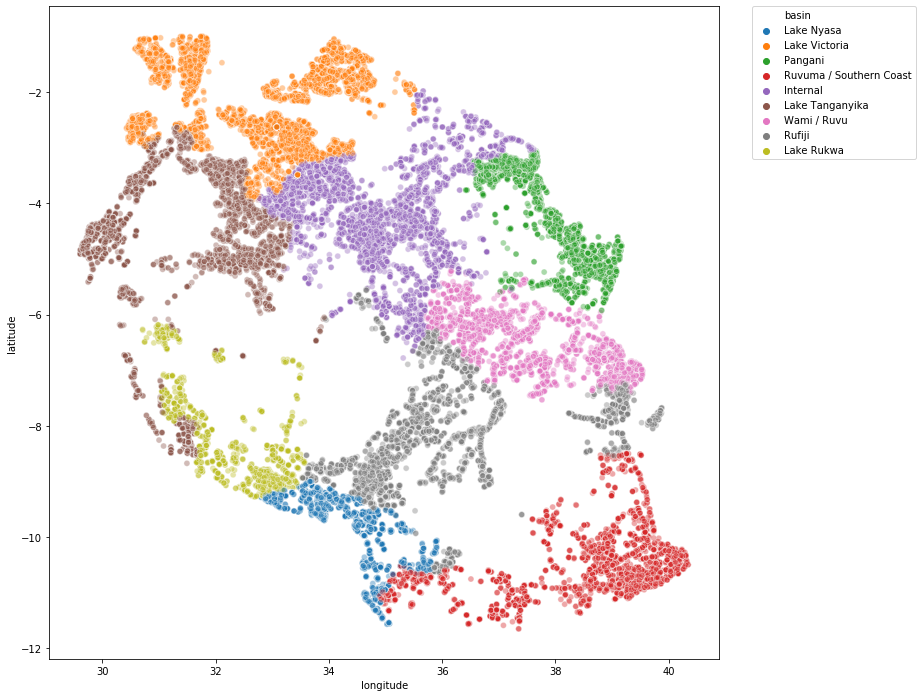

In [49]:
fig, ax= plt.subplots(figsize=(12,12))
sns.scatterplot('longitude', 'latitude', data=df, alpha=0.4, ax=ax, hue='basin')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  